In [1]:
# Required libraries  
from utils import one_hot_encode, binarize_data, binarize_3d, plot_central_planes, plot_3d, create_dir
   
import os
import glob
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
import cv2

## Import dataset

In [2]:
datasets_base_path = '../03_CT_Scan_Images/' #path to directory with '.mat' datasets
datasets = glob.glob(datasets_base_path +'*.mat') #find all '.mat' datasets in the directory
dataset_names = [path.replace(datasets_base_path, '').replace('.mat', '') for path in datasets] #extract dataset name

In [3]:
id_ = 0 #TO DEFINE, index of the dataset in 'datasets' variable

print(dataset_names[id_] + ' dataset is chosen\n')
rawMatData = loadmat(datasets[id_]) # load dataset with id_ = 0
bwImage = rawMatData["bwImage"]
ctImage = rawMatData["ctImage"]

print('Data shape: ', ctImage.shape)

Beta_2_0.2 dataset is chosen

Data shape:  (516, 516, 516)


## Run binarization algorithm

In [4]:
%%time

res_3d, res_porosity = binarize_3d(ctImage)

print('Resulting shape:', res_3d.shape)

Resulting shape: (516, 516, 516)
CPU times: user 1min 29s, sys: 2.56 s, total: 1min 31s
Wall time: 36.8 s


## Save results to npz or txt files (for further suimulations)
**np.savez_compressed** to save the array in the compressed NPZ format. You'll have to used **np.load** to read the file back into an array.

In [16]:
save_compressed = True # if TRUE data will be saved to NPZ format, else - to txt
    
flat_data = np.uint8(res_3d.flatten())
dir_to_save = './binarization_results/'

if save_compressed:
    dir_to_save += 'npz/'
    create_dir(dir_to_save+'npz/')
    filename_3d = dir_to_save + dataset_names[id_] + '_predicted'
    filename_por = dir_to_save + dataset_names[id_] + '_predicted_porosity'
    
    np.savez_compressed(filename_3d, data = flat_data)
    np.savez_compressed(filename_por, data = res_porosity)
    
else:
    dir_to_save += 'txt/'
    create_dir(dir_to_save)
    filename_3d = dir_to_save + dataset_names[id_] + '_predicted.txt'
    filename_por = dir_to_save + dataset_names[id_] + '_predicted_porosity'
    
    np.savetxt(filename_3d, flat_data, fmt='%i', delimiter='/n')
    np.savez_compressed(filename_por, data = res_porosity)

In [69]:
# Example of loading data
np.load(dir_to_save + dataset_names[id_] + '_predicted.npz')['data']

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

## Plot binarized cube

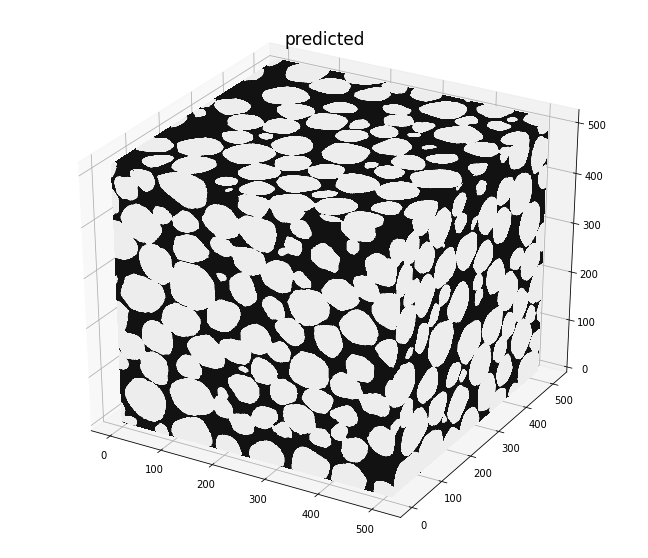

In [6]:
plot_3d(res_3d, img_title='predicted')

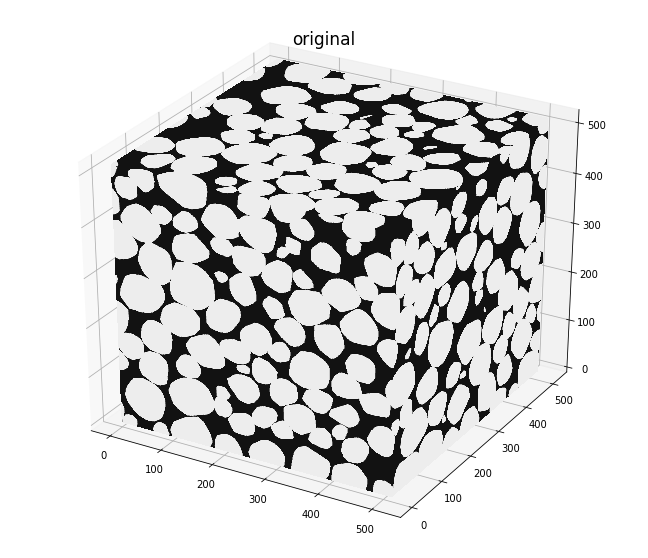

In [7]:
plot_3d(bwImage, img_title = 'original')

## Visualize orthogonal central planes

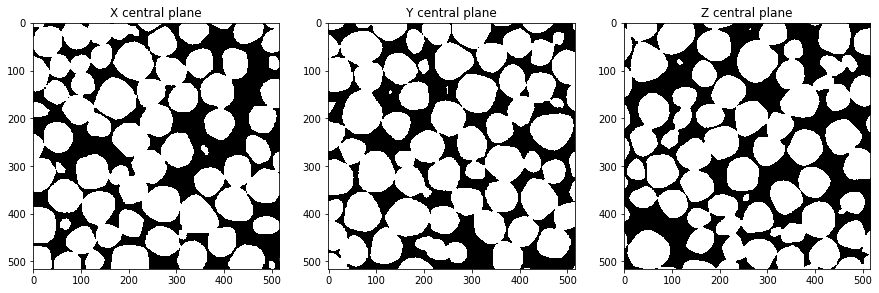

In [8]:
#predicted
plot_central_planes(res_3d)

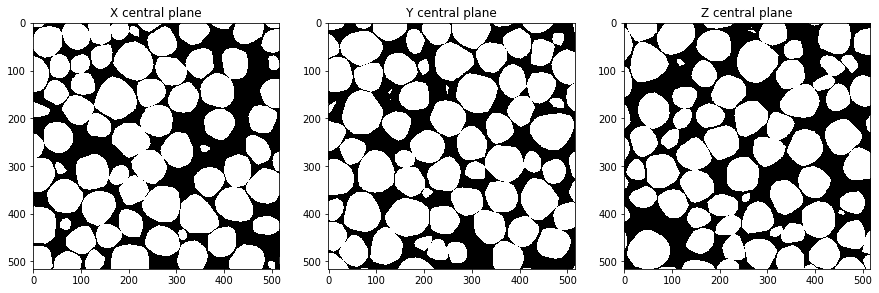

In [9]:
#original
plot_central_planes(bwImage)

## Plot porosity

In [24]:
#estimate original porosity
original_porosity = []
for bw_img_orig in bwImage:
    original_porosity.append(np.sum(bw_img_orig==0)/np.prod(bw_img_orig.shape))

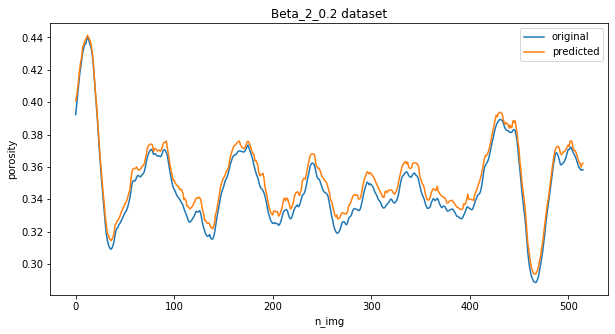

In [28]:
plt.figure(figsize = (10,5))
plt.title(dataset_names[id_] + ' dataset')
plt.plot(original_porosity, label = 'original')
plt.plot(res_porosity, label = 'predicted')
plt.ylabel('porosity')
plt.xlabel('n_img')
plt.legend()
plt.show()